In [5]:
import tensorflow as tf
import numpy as np

# Sample Dataset (x1 is real, x2 is fake)
x1_array = np.array([[255, 128, 255], [128, 255, 128], [255, 128, 255]], dtype=np.float32)
x2_array = np.array([[100, 200, 150], [180, 100, 180], [150, 200, 100]], dtype=np.float32)

# Normalize the values by dividing by the maximum value (255)
x1 = x1_array / 255.0
x2 = x2_array / 255.0

# Output the normalized datasets
print("Normalized x1:")
print(x1)

print("\nNormalized x2:")
print(x2)

# Labels (1-hot encoding): [1, 0] for real, [0, 1] for fake
y1 = np.array([1, 0], dtype=np.float32)
y2 = np.array([0, 1], dtype=np.float32)

# Dataset
D = [(x1, y1), (x2, y2)]

# Initial Visibility Matrix v (3x3)
v = np.ones_like(x1)

# Define a simple model for demonstration (fθ)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(3, 3)),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

# Initialize the model
model = build_model()

# Function to train the model on dataset D
def train_model(D, model, epochs=5):
    for epoch in range(epochs):
        total_loss = 0
        for x, y in D:
            x = np.expand_dims(x, axis=0)  # Add batch dimension
            y = np.expand_dims(y, axis=0)  # Add batch dimension
            
            # Train on batch
            loss = model.train_on_batch(x, y)
            total_loss += loss
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(D):.4f}')

# Function to update the visibility matrix v
def update_visibility_matrix(v, D, model):
    v_new = np.copy(v)  # Copy the current visibility matrix
    for x, y in D:
        x = np.expand_dims(x, axis=0)  # Add batch dimension
        y_pred = model.predict(x, verbose=0)[0]  # Predict on x

        true_class = np.argmax(y)
        p = y_pred[true_class]

        # Update v based on loss for the true class
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                # Max(0, 1 - predicted_score * true_label)
                loss_v = max(0, 1 - p * y[true_class])
                v_new[i, j] -= 0.01 * loss_v  # Adjust v using a small learning rate (0.01)

    return np.clip(v_new, 0.5, 1.5)  # Ensure v stays in a reasonable range

# Function to create a new dataset Dev with enhanced visibility
def create_dev(D, v):
    Dev = []
    for x, y in D:
        v_x = v * x  # Element-wise multiplication
        Dev.append((v_x, y))
    return Dev

# Initial Training on Dataset D
print("Initial Training on Dataset D:")
train_model(D, model, epochs=5)

# Update the visibility matrix after the first iteration
print("\nUpdating visibility matrix after iteration 1:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev with enhanced visibility
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev:")
train_model(Dev, model, epochs=5)

# Update the visibility matrix again (second iteration)
print("\nUpdating visibility matrix after iteration 2:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev after second iteration
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev after second iteration:")
train_model(Dev, model, epochs=5)

print("The Dataset D: ")
print(D)
print("The Dataset Dev: ")
print(Dev)

Normalized x1:
[[1.        0.5019608 1.       ]
 [0.5019608 1.        0.5019608]
 [1.        0.5019608 1.       ]]

Normalized x2:
[[0.39215687 0.78431374 0.5882353 ]
 [0.7058824  0.39215687 0.7058824 ]
 [0.5882353  0.78431374 0.39215687]]
Initial Training on Dataset D:
Epoch [1/5], Loss: 0.5429
Epoch [2/5], Loss: 0.5387
Epoch [3/5], Loss: 0.5361
Epoch [4/5], Loss: 0.5338
Epoch [5/5], Loss: 0.5316

Updating visibility matrix after iteration 1:
Updated Visibility Matrix v:
[[0.9919635 0.9919635 0.9919635]
 [0.9919635 0.9919635 0.9919635]
 [0.9919635 0.9919635 0.9919635]]

Retraining on Dataset Dev:
Epoch [1/5], Loss: 0.5306
Epoch [2/5], Loss: 0.5286
Epoch [3/5], Loss: 0.5267
Epoch [4/5], Loss: 0.5248
Epoch [5/5], Loss: 0.5229

Updating visibility matrix after iteration 2:
Updated Visibility Matrix v:
[[0.98400235 0.98400235 0.98400235]
 [0.98400235 0.98400235 0.98400235]
 [0.98400235 0.98400235 0.98400235]]

Retraining on Dataset Dev after second iteration:
Epoch [1/5], Loss: 0.5222
Epo

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess the image (resize to 3x3 for simplicity)
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize the values
    return img_array

# Load real and fake images
x1 = preprocess_image('frames_dataset\\001_frame_5.jpg')
x2 = preprocess_image('frames_dataset\\001_870_frame_5.jpg')

# Output the normalized datasets
print("Normalized x1 (real image):")
print(x1)

print("\nNormalized x2 (fake image):")
print(x2)

# Labels (1-hot encoding): [1, 0] for real, [0, 1] for fake
y1 = np.array([1, 0], dtype=np.float32)
y2 = np.array([0, 1], dtype=np.float32)

# Dataset
D = [(x1, y1), (x2, y2)]

# Initial Visibility Matrix v (3x3)
v = np.ones_like(x1)

# Define a simple model for demonstration (fθ)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(150, 150, 3)),  # Input shape is now (3, 3, 3) for RGB images
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

# Initialize the model
model = build_model()

# Function to train the model on dataset D
def train_model(D, model, epochs=5):
    for epoch in range(epochs):
        total_loss = 0
        for x, y in D:
            x = np.expand_dims(x, axis=0)  # Add batch dimension
            y = np.expand_dims(y, axis=0)  # Add batch dimension
            
            # Train on batch
            loss = model.train_on_batch(x, y)
            total_loss += loss
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(D):.4f}')

# Function to update the visibility matrix v
def update_visibility_matrix(v, D, model):
    v_new = np.copy(v)  # Copy the current visibility matrix
    for x, y in D:
        x = np.expand_dims(x, axis=0)  # Add batch dimension
        y_pred = model.predict(x, verbose=0)[0]  # Predict on x

        true_class = np.argmax(y)
        p = y_pred[true_class]

        # Update v based on loss for the true class
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                # Max(0, 1 - predicted_score * true_label)
                loss_v = max(0, 1 - p * y[true_class])
                v_new[i, j] -= 0.01 * loss_v  # Adjust v using a small learning rate (0.01)

    return np.clip(v_new, 0.5, 1.5)  # Ensure v stays in a reasonable range

# Function to create a new dataset Dev with enhanced visibility
def create_dev(D, v):
    Dev = []
    for x, y in D:
        v_x = v * x  # Element-wise multiplication
        Dev.append((v_x, y))
    return Dev

# Initial Training on Dataset D
print("Initial Training on Dataset D:")
train_model(D, model, epochs=5)

# Update the visibility matrix after the first iteration
print("\nUpdating visibility matrix after iteration 1:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev with enhanced visibility
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev:")
train_model(Dev, model, epochs=5)

# Update the visibility matrix again (second iteration)
print("\nUpdating visibility matrix after iteration 2:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev after second iteration
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev after second iteration:")
train_model(Dev, model, epochs=5)

print("The Dataset D: ")
print(D)
print("The Dataset Dev: ")
print(Dev)


Normalized x1 (real image):
[[[0.9490196  0.9490196  0.9490196 ]
  [0.9490196  0.9490196  0.9490196 ]
  [0.9490196  0.9490196  0.9490196 ]
  ...
  [0.23921569 0.25882354 0.24313726]
  [0.21568628 0.23529412 0.21960784]
  [0.27058825 0.32156864 0.34509805]]

 [[0.9843137  0.9843137  0.9843137 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.18039216 0.20392157 0.1882353 ]
  [0.1882353  0.23137255 0.2       ]
  [0.21176471 0.29411766 0.3137255 ]]

 [[0.972549   0.972549   0.972549  ]
  [0.98039216 0.98039216 0.98039216]
  [0.98039216 0.98039216 0.98039216]
  ...
  [0.18039216 0.20392157 0.1882353 ]
  [0.19607843 0.24313726 0.22745098]
  [0.27450982 0.38431373 0.39607844]]

 ...

 [[0.6901961  0.7372549  0.72156864]
  [0.68235296 0.7254902  0.7019608 ]
  [0.6901961  0.72156864 0.6784314 ]
  ...
  [0.63529414 0.68235296 0.63529414]
  [0.627451   0.6784314  0.6117647 ]
  [0.5803922  0.57254905 0.5137255 ]]

 [[0.7176471  0.7647059  0.7490196 ]
  [0.6862

Displaying images in Dataset D:


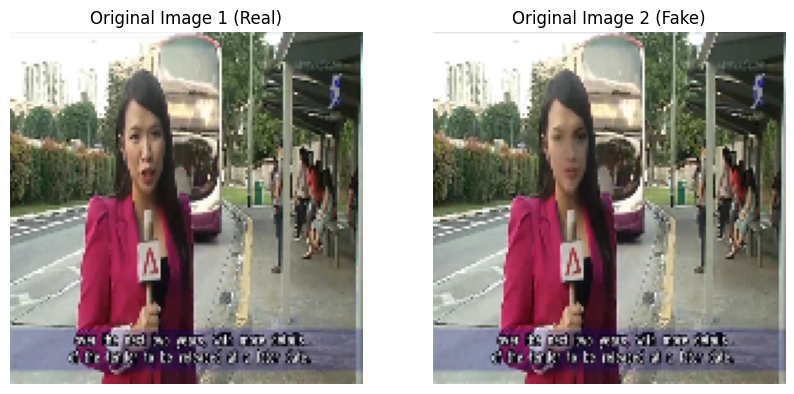

Displaying images in Dataset Dev:


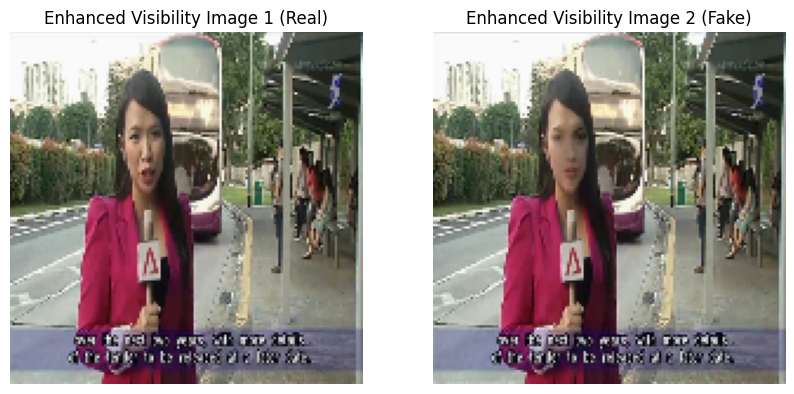

In [27]:
import matplotlib.pyplot as plt
# Function to plot images in dataset
def plot_images(dataset, title):
    fig, axes = plt.subplots(1, len(dataset), figsize=(5 * len(dataset), 5))
    for i, (img, label) in enumerate(dataset):
        ax = axes[i]
        ax.imshow(img)  # Display the image
        ax.axis('off')  # Hide the axes
        class_label = "Fake" if np.argmax(label) == 1 else "Real"
        ax.set_title(f"{title} Image {i+1} ({class_label})")
    plt.show()

# Plot images in Dataset D
print("Displaying images in Dataset D:")
plot_images(D, "Original")

# Plot images in Dataset Dev
print("Displaying images in Dataset Dev:")
plot_images(Dev, "Enhanced Visibility")

In [4]:
import matplotlib.pyplot as plt
# Function to plot images in dataset
def plot_images(dataset, title):
    fig, axes = plt.subplots(1, len(dataset), figsize=(5 * len(dataset), 5))
    for i, (img, label) in enumerate(dataset):
        ax = axes[i]
        ax.imshow(img)  # Display the image
        ax.axis('off')  # Hide the axes
        class_label = "Fake" if np.argmax(label) == 1 else "Real"
        ax.set_title(f"{title} Image {i+1} ({class_label})")
    plt.show()

Normalized x1 (real image):
[[[0.9490196  0.9490196  0.9490196 ]
  [0.9490196  0.9490196  0.9490196 ]
  [0.9490196  0.9490196  0.9490196 ]
  ...
  [0.23921569 0.25882354 0.24313726]
  [0.21568628 0.23529412 0.21960784]
  [0.27058825 0.32156864 0.34509805]]

 [[0.9843137  0.9843137  0.9843137 ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.18039216 0.20392157 0.1882353 ]
  [0.1882353  0.23137255 0.2       ]
  [0.21176471 0.29411766 0.3137255 ]]

 [[0.972549   0.972549   0.972549  ]
  [0.98039216 0.98039216 0.98039216]
  [0.98039216 0.98039216 0.98039216]
  ...
  [0.18039216 0.20392157 0.1882353 ]
  [0.19607843 0.24313726 0.22745098]
  [0.27450982 0.38431373 0.39607844]]

 ...

 [[0.6901961  0.7372549  0.72156864]
  [0.68235296 0.7254902  0.7019608 ]
  [0.6901961  0.72156864 0.6784314 ]
  ...
  [0.63529414 0.68235296 0.63529414]
  [0.627451   0.6784314  0.6117647 ]
  [0.5803922  0.57254905 0.5137255 ]]

 [[0.7176471  0.7647059  0.7490196 ]
  [0.6862

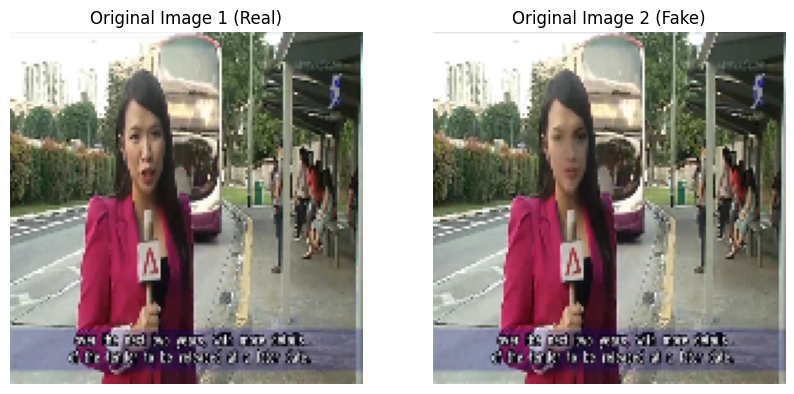

Displaying images in Dataset Dev:


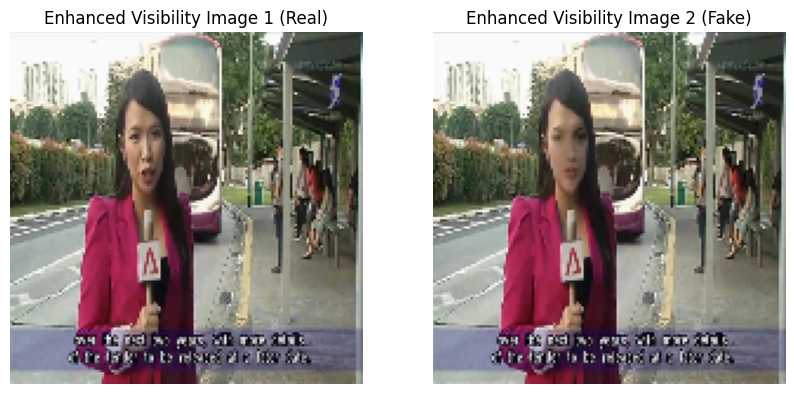

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess the image (resize to 3x3 for simplicity)
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize the values
    return img_array

# Load real and fake images
x1 = preprocess_image('frames_dataset\\001_frame_5.jpg')
x2 = preprocess_image('frames_dataset\\001_870_frame_5.jpg')

# Output the normalized datasets
print("Normalized x1 (real image):")
print(x1)

print("\nNormalized x2 (fake image):")
print(x2)

# Labels (1-hot encoding): [1, 0] for real, [0, 1] for fake
y1 = np.array([1, 0], dtype=np.float32)
y2 = np.array([0, 1], dtype=np.float32)

# Dataset
D = [(x1, y1), (x2, y2)]

# Initial Visibility Matrix v (3x3)
v = np.ones_like(x1)

# Define a simple model for demonstration (fθ)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(150, 150, 3)),  # Input shape is now (3, 3, 3) for RGB images
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

# Initialize the model
model = build_model()

# Function to train the model on dataset D
def train_model(D, model, epochs=5):
    for epoch in range(epochs):
        total_loss = 0
        for x, y in D:
            x = np.expand_dims(x, axis=0)  # Add batch dimension
            y = np.expand_dims(y, axis=0)  # Add batch dimension
            
            # Train on batch
            loss = model.train_on_batch(x, y)
            total_loss += loss
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(D):.4f}')

# Function to update the visibility matrix v
def update_visibility_matrix(v, D, model):
    v_new = np.copy(v)  # Copy the current visibility matrix
    for x, y in D:
        x = np.expand_dims(x, axis=0)  # Add batch dimension
        y_pred = model.predict(x, verbose=0)[0]  # Predict on x

        true_class = np.argmax(y)
        p = y_pred[true_class]

        # Update v based on loss for the true class
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                # Max(0, 1 - predicted_score * true_label)
                loss_v = max(0, 1 - p * y[true_class])
                v_new[i, j] -= 0.01 * loss_v  # Adjust v using a small learning rate (0.01)

    return np.clip(v_new, 0.8, 1.2)  # Ensure v stays in a reasonable range

# Function to create a new dataset Dev with enhanced visibility
def create_dev(D, v):
    Dev = []
    for x, y in D:
        v_x = v * x  # Element-wise multiplication
        Dev.append((v_x, y))
    return Dev

# Initial Training on Dataset D
print("Initial Training on Dataset D:")
train_model(D, model, epochs=5)

# Update the visibility matrix after the first iteration
print("\nUpdating visibility matrix after iteration 1:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev with enhanced visibility
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev:")
train_model(Dev, model, epochs=5)

# Update the visibility matrix again (second iteration)
print("\nUpdating visibility matrix after iteration 2:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev after second iteration
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev after second iteration:")
train_model(Dev, model, epochs=5)

print("The Dataset D: ")
print(D)
print("The Dataset Dev: ")
print(Dev)
# Plot images in Dataset D
print("Displaying images in Dataset D:")
plot_images(D, "Original")

# Plot images in Dataset Dev
print("Displaying images in Dataset Dev:")
plot_images(Dev, "Enhanced Visibility")

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess the image (resize to 3x3 for simplicity)
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize the values
    return img_array
x1 = preprocess_image('frames_dataset\\009_frame_12.jpg')
# Initial Visibility Matrix v (3x3)
v = np.ones_like(x1)
print(v)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess the image (resize to 3x3 for simplicity)
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize the values
    return img_array

# Load real and fake images
x1 = preprocess_image('frames_dataset\\009_frame_12.jpg')
x2 = preprocess_image('frames_dataset\\009_027_frame_12.jpg')

# Output the normalized datasets
print("Normalized x1 (real image):")
print(x1)

print("\nNormalized x2 (fake image):")
print(x2)

# Labels (1-hot encoding): [1, 0] for real, [0, 1] for fake
y1 = np.array([1, 0], dtype=np.float32)
y2 = np.array([0, 1], dtype=np.float32)

# Dataset
D = [(x1, y1), (x2, y2)]

# Initial Visibility Matrix v (3x3)
v = np.ones_like(x1)

# Define a simple model for demonstration (fθ)
def build_model():
   cc

# Initialize the model
model = build_model()

# Function to train the model on dataset D
def train_model(D, model, epochs=5):
    for epoch in range(epochs):
        total_loss = 0
        for x, y in D:
            x = np.expand_dims(x, axis=0)  # Add batch dimension
            y = np.expand_dims(y, axis=0)  # Add batch dimension
            
            # Train on batch
            loss = model.train_on_batch(x, y)
            total_loss += loss
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(D):.4f}')

# Function to update the visibility matrix v
def update_visibility_matrix(v, D, model):
    v_new = np.copy(v)  # Copy the current visibility matrix
    for x, y in D:
        x = np.expand_dims(x, axis=0)  # Add batch dimension
        y_pred = model.predict(x, verbose=0)[0]  # Predict on x

        true_class = np.argmax(y)
        p = y_pred[true_class]

        # Update v based on loss for the true class
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                # Max(0, 1 - predicted_score * true_label)
                loss_v = max(0, 1 - p * y[true_class])
                v_new[i, j] -= 0.01 * loss_v  # Adjust v using a small learning rate (0.01)

    return np.clip(v_new, 0.5, 1.5)  # Ensure v stays in a reasonable range

# Function to create a new dataset Dev with enhanced visibility
def create_dev(D, v):
    Dev = []
    for x, y in D:
        v_x = v * x  # Element-wise multiplication
        Dev.append((v_x, y))
    return Dev

# Initial Training on Dataset D
print("Initial Training on Dataset D:")
train_model(D, model, epochs=5)

# Update the visibility matrix after the first iteration
print("\nUpdating visibility matrix after iteration 1:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev with enhanced visibility
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev:")
train_model(Dev, model, epochs=5)

# Update the visibility matrix again (second iteration)
print("\nUpdating visibility matrix after iteration 2:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev after second iteration
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev after second iteration:")
train_model(Dev, model, epochs=5)

print("The Dataset D: ")
print(D)
print("The Dataset Dev: ")
print(Dev)


Normalized x1 (real image):
[[[0.06666667 0.12156863 0.15686275]
  [0.0627451  0.11764706 0.16078432]
  [0.06666667 0.10980392 0.18039216]
  ...
  [0.00392157 0.12941177 0.21960784]
  [0.01960784 0.12156863 0.1882353 ]
  [0.03529412 0.11764706 0.18431373]]

 [[0.09803922 0.14509805 0.2       ]
  [0.07450981 0.11764706 0.1882353 ]
  [0.07450981 0.11764706 0.20392157]
  ...
  [0.01176471 0.13333334 0.24313726]
  [0.03137255 0.1254902  0.21960784]
  [0.03921569 0.1254902  0.21568628]]

 [[0.12156863 0.18431373 0.24705882]
  [0.07843138 0.13725491 0.21960784]
  [0.07843138 0.13333334 0.23529412]
  ...
  [0.01176471 0.14901961 0.27450982]
  [0.03529412 0.14117648 0.24705882]
  [0.04313726 0.14509805 0.2509804 ]]

 ...

 [[0.         0.01568628 0.12941177]
  [0.00784314 0.         0.19215687]
  [0.00784314 0.         0.19215687]
  ...
  [0.         0.         0.03921569]
  [0.         0.         0.03921569]
  [0.         0.         0.03921569]]

 [[0.         0.01568628 0.12941177]
  [0.0078

Displaying images in Dataset D:


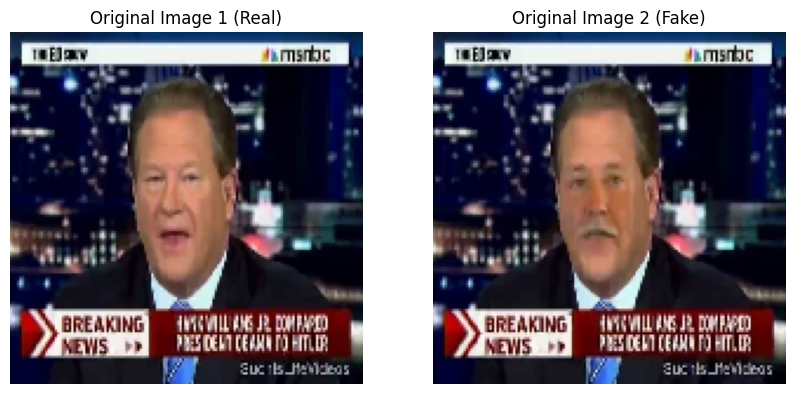

Displaying images in Dataset Dev:


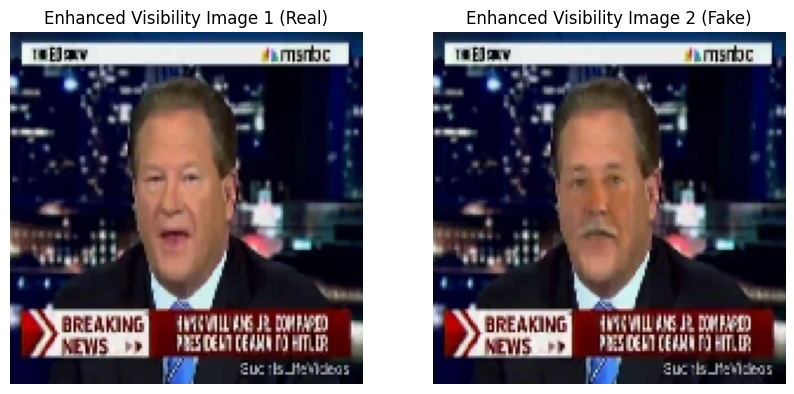

In [4]:
# Plot images in Dataset D
print("Displaying images in Dataset D:")
plot_images(D, "Original")

# Plot images in Dataset Dev
print("Displaying images in Dataset Dev:")
plot_images(Dev, "Enhanced Visibility")

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess the image (resize to 3x3 for simplicity)
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize the values
    return img_array

# Load real and fake images
x1 = preprocess_image('frames_dataset\\002_frame_1.jpg')
x2 = preprocess_image('frames_dataset\\002_006_frame_1.jpg')

# Output the normalized datasets
print("Normalized x1 (real image):")
print(x1)

print("\nNormalized x2 (fake image):")
print(x2)

# Labels (1-hot encoding): [1, 0] for real, [0, 1] for fake
y1 = np.array([1, 0], dtype=np.float32)
y2 = np.array([0, 1], dtype=np.float32)

# Dataset
D = [(x1, y1), (x2, y2)]

# Initial Visibility Matrix v (3x3)
v = np.ones_like(x1)

# Define a simple model for demonstration (fθ)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(150, 150, 3)),  # Input shape is now (3, 3, 3) for RGB images
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

# Initialize the model
model = build_model()

# Function to train the model on dataset D
def train_model(D, model, epochs=5):
    for epoch in range(epochs):
        total_loss = 0
        for x, y in D:
            x = np.expand_dims(x, axis=0)  # Add batch dimension
            y = np.expand_dims(y, axis=0)  # Add batch dimension
            
            # Train on batch
            loss = model.train_on_batch(x, y)
            total_loss += loss
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(D):.4f}')

# Function to update the visibility matrix v
def update_visibility_matrix(v, D, model):
    v_new = np.copy(v)  # Copy the current visibility matrix
    for x, y in D:
        x = np.expand_dims(x, axis=0)  # Add batch dimension
        y_pred = model.predict(x, verbose=0)[0]  # Predict on x

        true_class = np.argmax(y)
        p = y_pred[true_class]

        # Update v based on loss for the true class
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                # Max(0, 1 - predicted_score * true_label)
                loss_v = max(0, 1 - p * y[true_class])
                v_new[i, j] -= 0.01 * loss_v  # Adjust v using a small learning rate (0.01)

    return np.clip(v_new, 0.5, 1.5)  # Ensure v stays in a reasonable range

# Function to create a new dataset Dev with enhanced visibility
def create_dev(D, v):
    Dev = []
    for x, y in D:
        v_x = v * x  # Element-wise multiplication
        Dev.append((v_x, y))
    return Dev

# Initial Training on Dataset D
print("Initial Training on Dataset D:")
train_model(D, model, epochs=5)

# Update the visibility matrix after the first iteration
print("\nUpdating visibility matrix after iteration 1:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev with enhanced visibility
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev:")
train_model(Dev, model, epochs=5)

# Update the visibility matrix again (second iteration)
print("\nUpdating visibility matrix after iteration 2:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev after second iteration
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev after second iteration:")
train_model(Dev, model, epochs=5)

print("The Dataset D: ")
print(D)
print("The Dataset Dev: ")
print(Dev)


Normalized x1 (real image):
[[[0.24705882 0.34117648 0.4745098 ]
  [0.24705882 0.34117648 0.4745098 ]
  [0.23529412 0.33333334 0.45490196]
  ...
  [0.30980393 0.43137255 0.5411765 ]
  [0.30980393 0.43137255 0.5411765 ]
  [0.30980393 0.43137255 0.5411765 ]]

 [[0.24705882 0.34117648 0.4745098 ]
  [0.24705882 0.34117648 0.4745098 ]
  [0.23529412 0.33333334 0.45490196]
  ...
  [0.30980393 0.43137255 0.5411765 ]
  [0.30980393 0.43137255 0.5411765 ]
  [0.30980393 0.43137255 0.5411765 ]]

 [[0.24705882 0.34117648 0.4745098 ]
  [0.24705882 0.34117648 0.4745098 ]
  [0.23529412 0.33333334 0.45490196]
  ...
  [0.3137255  0.43137255 0.5411765 ]
  [0.3137255  0.43137255 0.5411765 ]
  [0.3137255  0.43137255 0.5411765 ]]

 ...

 [[0.19607843 0.19607843 0.20392157]
  [0.19607843 0.19607843 0.20392157]
  [0.20784314 0.1882353  0.21176471]
  ...
  [0.12156863 0.12941177 0.1764706 ]
  [0.12156863 0.13725491 0.18431373]
  [0.1254902  0.14117648 0.1882353 ]]

 [[0.19607843 0.19607843 0.19607843]
  [0.1960

Displaying images in Dataset D:


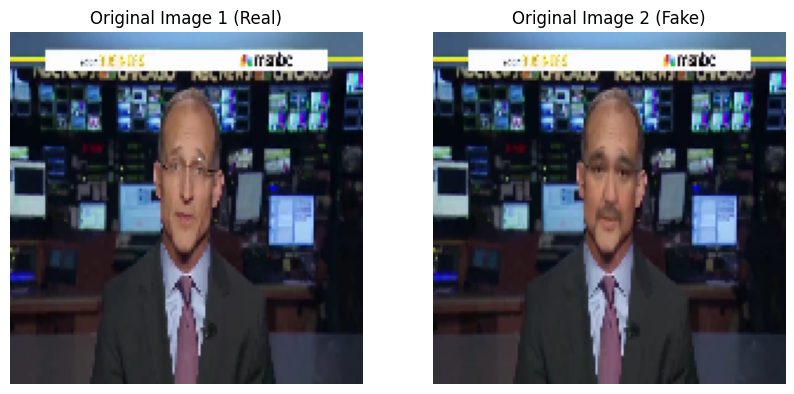

Displaying images in Dataset Dev:


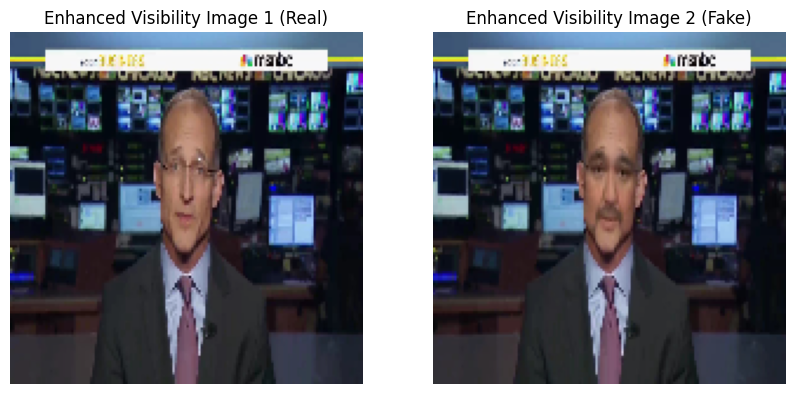

In [5]:
# Plot images in Dataset D
print("Displaying images in Dataset D:")
plot_images(D, "Original")

# Plot images in Dataset Dev
print("Displaying images in Dataset Dev:")
plot_images(Dev, "Enhanced Visibility")

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load and preprocess the image (resize to 3x3 for simplicity)
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize the values
    return img_array

# Load real and fake images
x1 = preprocess_image('frames_dataset\\093_frame_5.jpg')
x2 = preprocess_image('frames_dataset\\093_121_frame_5.jpg')

# Output the normalized datasets
print("Normalized x1 (real image):")
print(x1)

print("\nNormalized x2 (fake image):")
print(x2)

# Labels (1-hot encoding): [1, 0] for real, [0, 1] for fake
y1 = np.array([1, 0], dtype=np.float32)
y2 = np.array([0, 1], dtype=np.float32)

# Dataset
D = [(x1, y1), (x2, y2)]

# Initial Visibility Matrix v (3x3)
v = np.ones_like(x1)

# Define a simple model for demonstration (fθ)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(150, 150, 3)),  # Input shape is now (3, 3, 3) for RGB images
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

# Initialize the model
model = build_model()

# Function to train the model on dataset D
def train_model(D, model, epochs=5):
    for epoch in range(epochs):
        total_loss = 0
        for x, y in D:
            x = np.expand_dims(x, axis=0)  # Add batch dimension
            y = np.expand_dims(y, axis=0)  # Add batch dimension
            
            # Train on batch
            loss = model.train_on_batch(x, y)
            total_loss += loss
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(D):.4f}')

# Function to update the visibility matrix v
def update_visibility_matrix(v, D, model):
    v_new = np.copy(v)  # Copy the current visibility matrix
    for x, y in D:
        x = np.expand_dims(x, axis=0)  # Add batch dimension
        y_pred = model.predict(x, verbose=0)[0]  # Predict on x

        true_class = np.argmax(y)
        p = y_pred[true_class]

        # Update v based on loss for the true class
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                # Max(0, 1 - predicted_score * true_label)
                loss_v = max(0, 1 - p * y[true_class])
                v_new[i, j] -= 0.01 * loss_v  # Adjust v using a small learning rate (0.01)

    return np.clip(v_new, 0.5, 1.5)  # Ensure v stays in a reasonable range

# Function to create a new dataset Dev with enhanced visibility
def create_dev(D, v):
    Dev = []
    for x, y in D:
        v_x = v * x  # Element-wise multiplication
        Dev.append((v_x, y))
    return Dev

# Initial Training on Dataset D
print("Initial Training on Dataset D:")
train_model(D, model, epochs=5)

# Update the visibility matrix after the first iteration
print("\nUpdating visibility matrix after iteration 1:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev with enhanced visibility
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev:")
train_model(Dev, model, epochs=5)

# Update the visibility matrix again (second iteration)
print("\nUpdating visibility matrix after iteration 2:")
v = update_visibility_matrix(v, D, model)
print(f"Updated Visibility Matrix v:\n{v}")

# Create new dataset Dev after second iteration
Dev = create_dev(D, v)

# Retrain the model on the new dataset Dev
print("\nRetraining on Dataset Dev after second iteration:")
train_model(Dev, model, epochs=5)

print("The Dataset D: ")
print(D)
print("The Dataset Dev: ")
print(Dev)


Normalized x1 (real image):
[[[0.8901961  0.89411765 0.8745098 ]
  [0.8901961  0.89411765 0.8745098 ]
  [0.8862745  0.8901961  0.87058824]
  ...
  [0.90588236 0.90588236 0.90588236]
  [0.90588236 0.90588236 0.90588236]
  [0.90588236 0.90588236 0.90588236]]

 [[0.8901961  0.89411765 0.8745098 ]
  [0.8901961  0.89411765 0.8745098 ]
  [0.8862745  0.8901961  0.87058824]
  ...
  [0.90588236 0.90588236 0.90588236]
  [0.90588236 0.90588236 0.90588236]
  [0.90588236 0.90588236 0.90588236]]

 [[0.8901961  0.89411765 0.8745098 ]
  [0.8901961  0.89411765 0.8745098 ]
  [0.8862745  0.8901961  0.87058824]
  ...
  [0.90588236 0.90588236 0.90588236]
  [0.90588236 0.90588236 0.90588236]
  [0.90588236 0.90588236 0.90588236]]

 ...

 [[0.9254902  0.95686275 0.96862745]
  [0.9254902  0.9529412  0.99215686]
  [0.92156863 0.9490196  0.9882353 ]
  ...
  [0.95686275 0.96862745 0.99607843]
  [0.9529412  0.96862745 0.98039216]
  [0.9529412  0.96862745 0.98039216]]

 [[0.9254902  0.95686275 0.96862745]
  [0.9254

Displaying images in Dataset D:


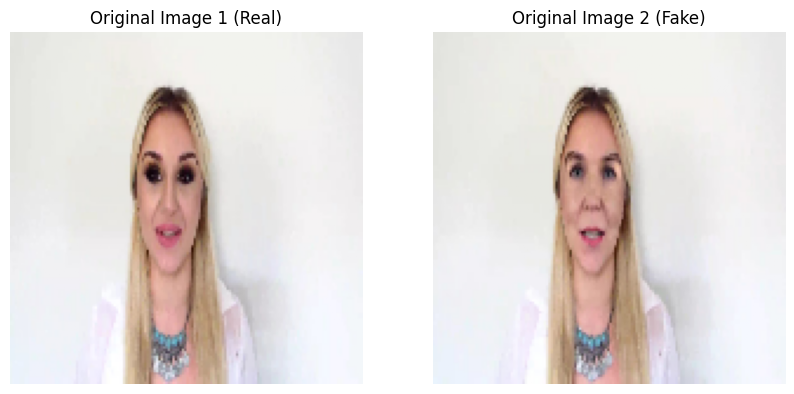

Displaying images in Dataset Dev:


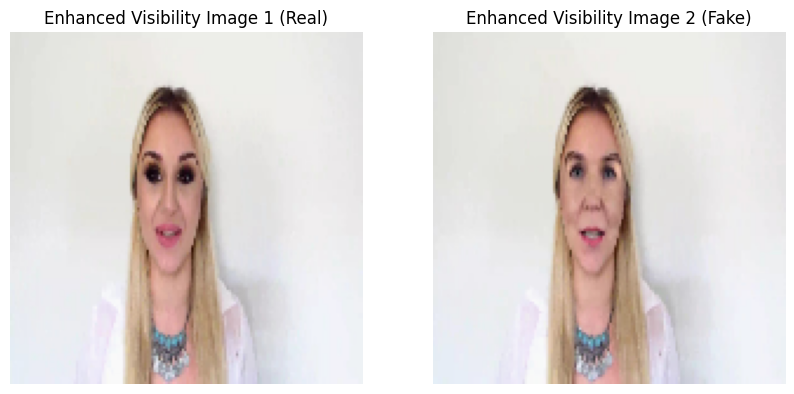

In [7]:
# Plot images in Dataset D
print("Displaying images in Dataset D:")
plot_images(D, "Original")

# Plot images in Dataset Dev
print("Displaying images in Dataset Dev:")
plot_images(Dev, "Enhanced Visibility")